In [4]:
import sys
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sb
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling
import string
from collections import Counter

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.metrics.pairwise import linear_kernel

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')
import re
from nltk.corpus import stopwords
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


In [5]:
swiggy_data =pd.read_csv("swiggy.csv")
swiggy_data.head()

,Restaurant,Cost per person,Type,Rating,Location,cost_for_2
0,Haldirams Chaat,125.0,"Chaat, Snacks",4.0,hadapsar,250
1,Rohit food,575.0,"Indian, Chinese, Desserts",3.9,hadapsar,1150
2,Sahich,100.0,Maharashtrian,4.0,hadapsar,200
3,SHAMS KITCHEN,50.0,South Indian,3.9,hadapsar,100
4,MORYA MISAL,75.0,"Snacks, Beverages",3.9,hadapsar,150


In [6]:
swiggy_data.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
swiggy_data.tail()

,Restaurant,Cost per person,Type,Rating,Location,cost_for_2
9278,Mughal's Restaurant,200.0,"North Indian, Mughlai",3.9,Kondhwa,400
9279,AK KITCHEN,100.0,North Indian,3.9,Kondhwa,200
9280,Hangyo Ice creams,125.0,"Ice Cream, Desserts",3.9,Kondhwa,250
9281,NutriHunger,175.0,Healthy Food,3.9,Kondhwa,350
9282,ANNAPURNA TIFFIN,100.0,"South Indian, Andhra, North Indian, Maharashtr...",4.0,Kondhwa,200


In [8]:
swiggy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9283 entries, 0 to 9282
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Restaurant       9283 non-null   object 
 1   Cost per person  9283 non-null   float64
 2   Type             9283 non-null   object 
 3   Rating           9283 non-null   float64
 4   Location         9283 non-null   object 
 5   cost_for_2       9283 non-null   int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 326.4+ KB


In [9]:
swiggy_data = swiggy_data[swiggy_data["Rating"] != "Like"]
swiggy_data["Rating"].value_counts()

3.9    5713
4.3     488
4.2     480
4.1     467
4.0     398
4.4     382
3.8     268
4.5     218
4.6     174
3.7     163
3.6     110
0.0      91
4.7      83
3.3      44
3.4      39
3.2      37
3.1      23
4.8      23
3.0      18
5.0      12
4.9      11
2.9      10
2.8       7
2.6       5
2.7       4
2.5       3
2.1       3
1.9       2
2.4       2
2.3       2
1.4       1
3.5       1
2.0       1
Name: Rating, dtype: int64

In [10]:
swiggy_data.describe()

,Cost per person,Rating,cost_for_2
count,9283.000000,9283.000000,9283.000000
mean,159.816923,3.945244,319.633847
std,94.554657,0.468071,189.109314
min,0.500000,0.000000,1.000000
25%,100.000000,3.900000,200.000000
50%,150.000000,3.900000,300.000000
75%,200.000000,4.100000,400.000000
max,1100.000000,5.000000,2200.000000


In [11]:
ranges = [0,200,400,600,800,1000,1200,1400,1600,1800,2000,2200,2400]


In [12]:
range_of_cost = swiggy_data["Cost per person"]
range_of_cost.head()
range_of_cost.groupby(pd.cut(range_of_cost, ranges)).count()

Cost per person
(0, 200]        7863
(200, 400]      1165
(400, 600]       216
(600, 800]        31
(800, 1000]        6
(1000, 1200]       2
(1200, 1400]       0
(1400, 1600]       0
(1600, 1800]       0
(1800, 2000]       0
(2000, 2200]       0
(2200, 2400]       0
Name: Cost per person, dtype: int64

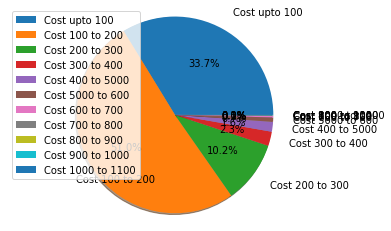

In [13]:
labels = ["Cost upto 100", "Cost 100 to 200", "Cost 200 to 300", "Cost 300 to 400", "Cost 400 to 5000", "Cost 5000 to 600", "Cost 600 to 700", "Cost 700 to 800", "Cost 800 to 900", "Cost 900 to 1000", "Cost 1000 to 1100"]
sizes = [3132, 4731, 947, 218, 150, 66, 23, 8, 1, 5, 2]
plt.pie(sizes, labels=labels,autopct='%1.1f%%', shadow=True,labeldistance=1.2,radius=1.5,center=(5, 3))
plt.axis('equal')
plt.legend() 
# To show legendplt.show()

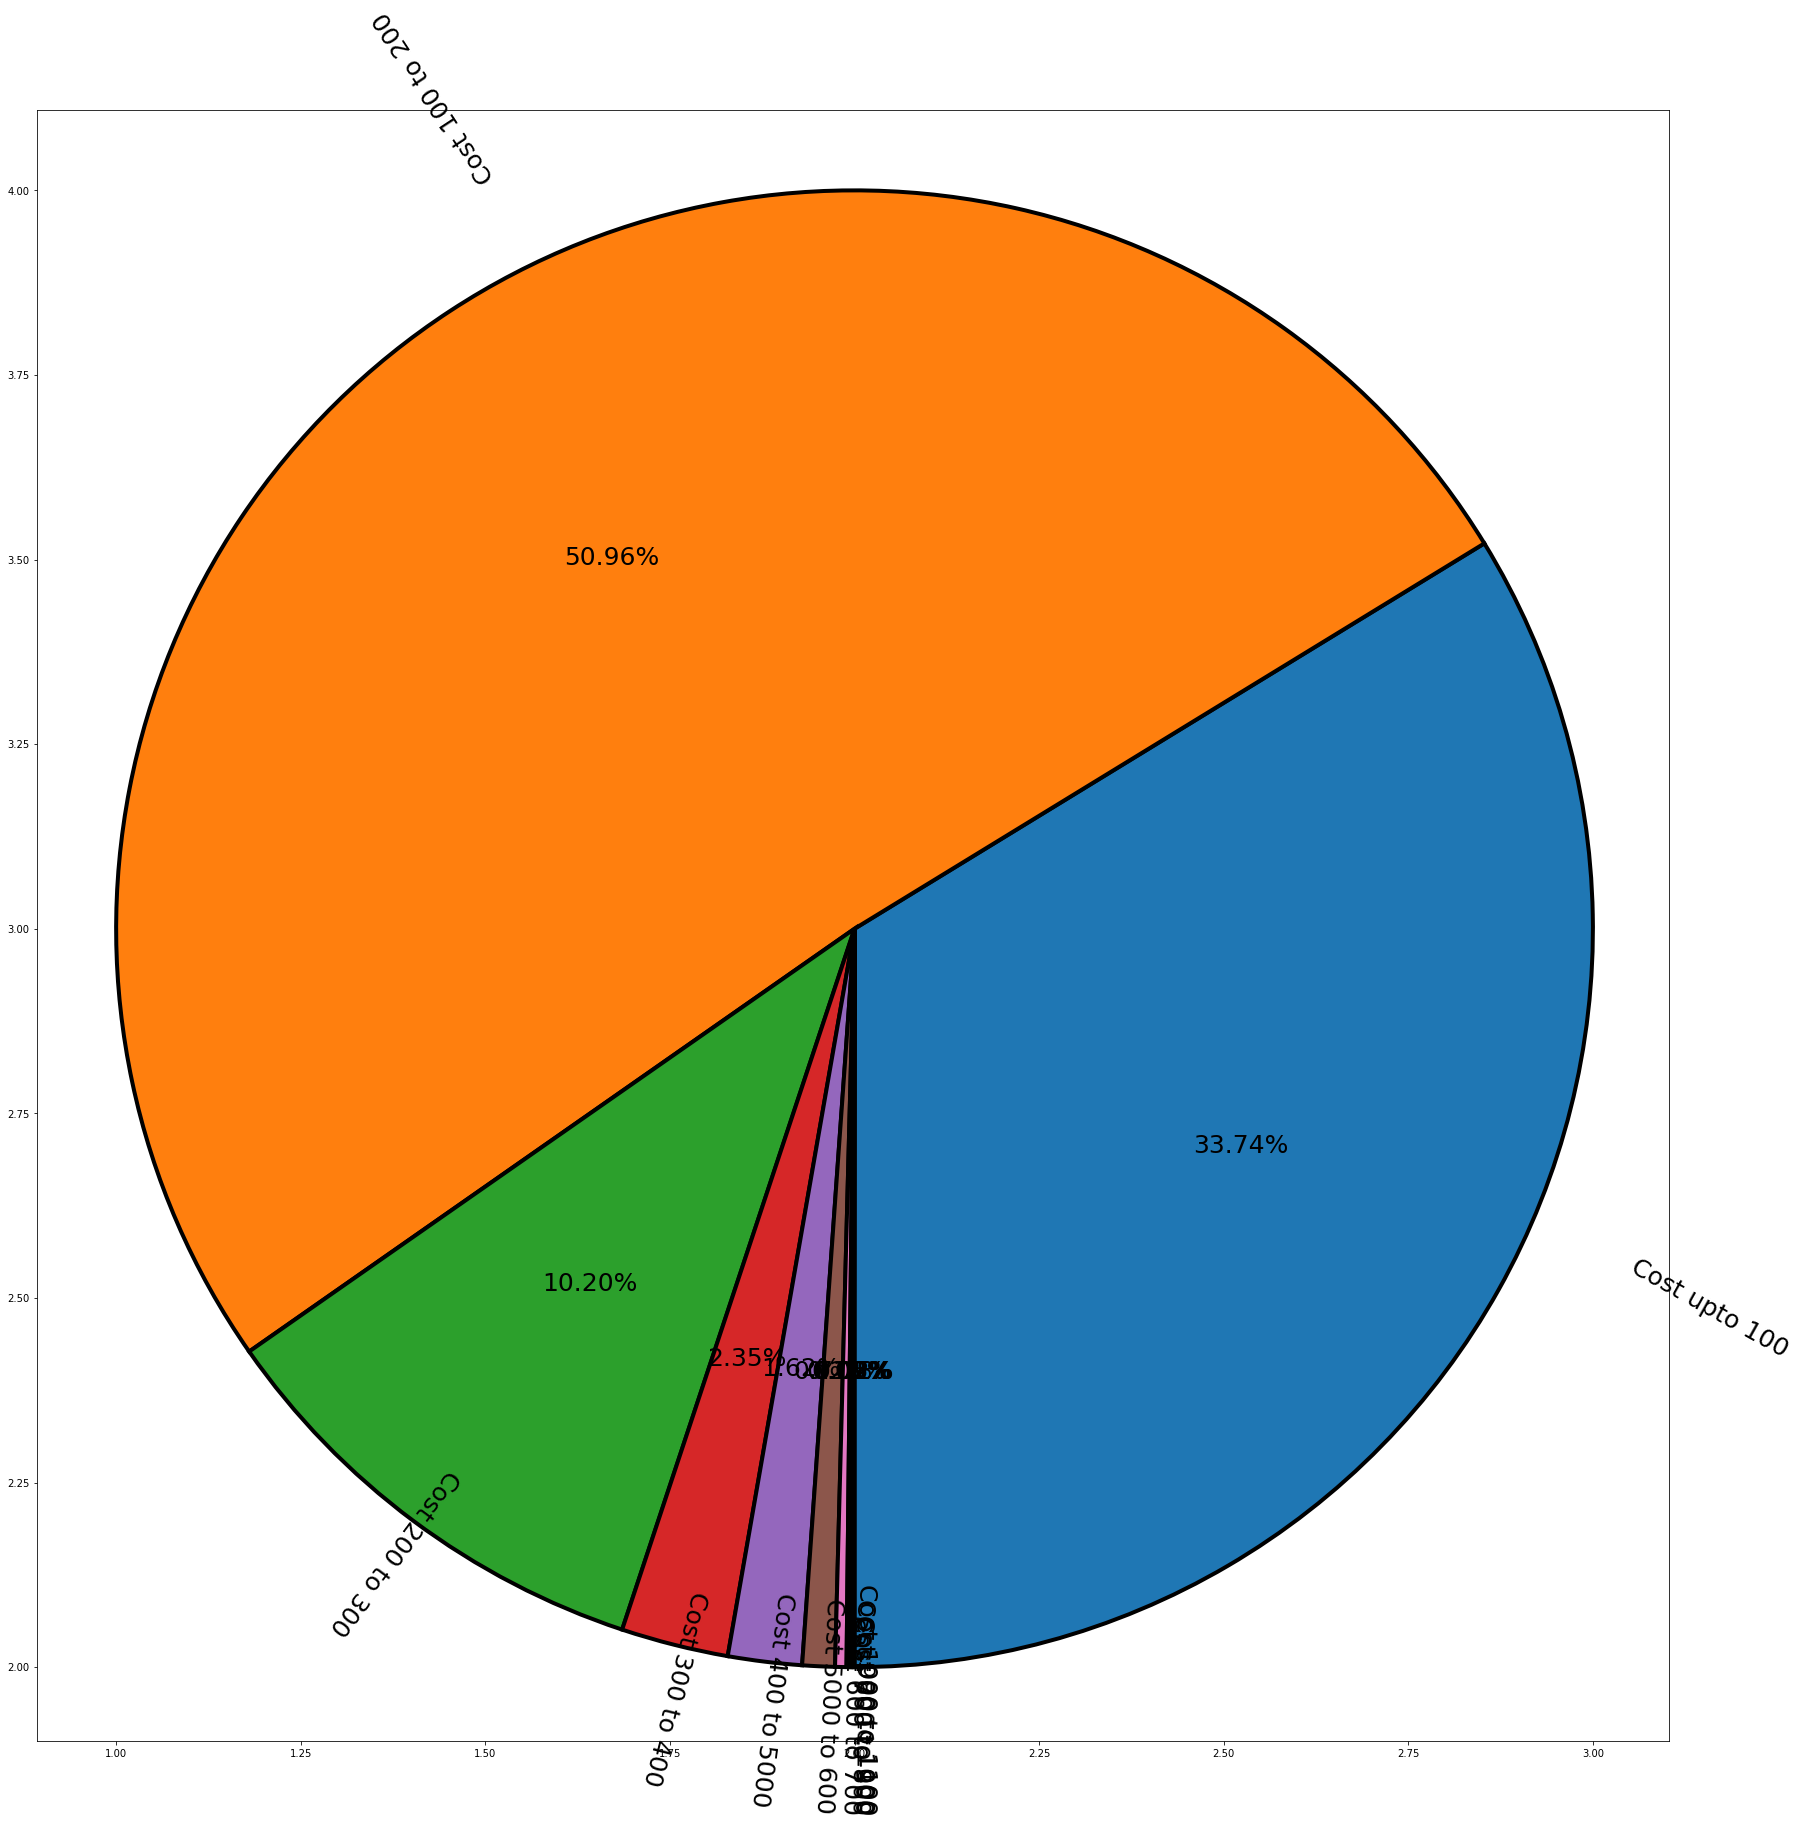

In [14]:
plt.figure(figsize = (30,30))
wedgeprops = {"linewidth": 4, 'width':1, "edgecolor":"k"} # Width = 1
textprops = {"fontsize":25}
plt.pie(
        sizes, 
        labels =labels,  
        autopct = "%0.2f%%", 
        pctdistance = 0.6, 
        #shadow =True, 
        labeldistance = 1.2, 
        startangle = 270,
        radius = 1, 
        counterclock = True, 
        wedgeprops = wedgeprops,
       textprops = textprops,
        center=(2, 3),
        frame=True,
        rotatelabels=True
        ) 
plt.show()

In [15]:
punctuations_list = string.punctuation

def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)

swiggy_data['Type'] = swiggy_data['Type'].apply(lambda x: cleaning_punctuations(x))
swiggy_data['Type'].tail()

9278                                 North Indian Mughlai
9279                                         North Indian
9280                                   Ice Cream Desserts
9281                                         Healthy Food
9282    South Indian Andhra North Indian Maharashtrian...
Name: Type, dtype: object

In [16]:
swiggy_data['Type'] = swiggy_data['Type'].apply(lambda text: cleaning_punctuations(text))
swiggy_data['Type'].head()

0               Chaat Snacks
1    Indian Chinese Desserts
2              Maharashtrian
3               South Indian
4           Snacks Beverages
Name: Type, dtype: object

In [17]:
text = ' '.join(swiggy_data['Type'])
words = text.split()

two_words = {' '.join(words):n for words,n in Counter(zip(words, words[1:])).items() if not  words[0][-1]==(',')}

In [18]:
two_words_dfc = pd.DataFrame(two_words.items(), columns=['Type', 'Frequency'])
two_words_dfc = two_words_dfc.sort_values(by = "Frequency", ascending = False)
two_words_20c = two_words_dfc[:20]
two_words_20c

,Type,Frequency
18,North Indian,2712
60,Fast Food,1803
2,Indian Chinese,1187
6,South Indian,708
51,Indian North,474
26,Ice Cream,458
10,Indian Biryani,436
104,Chinese North,404
59,Indian Fast,373
150,Street Food,300


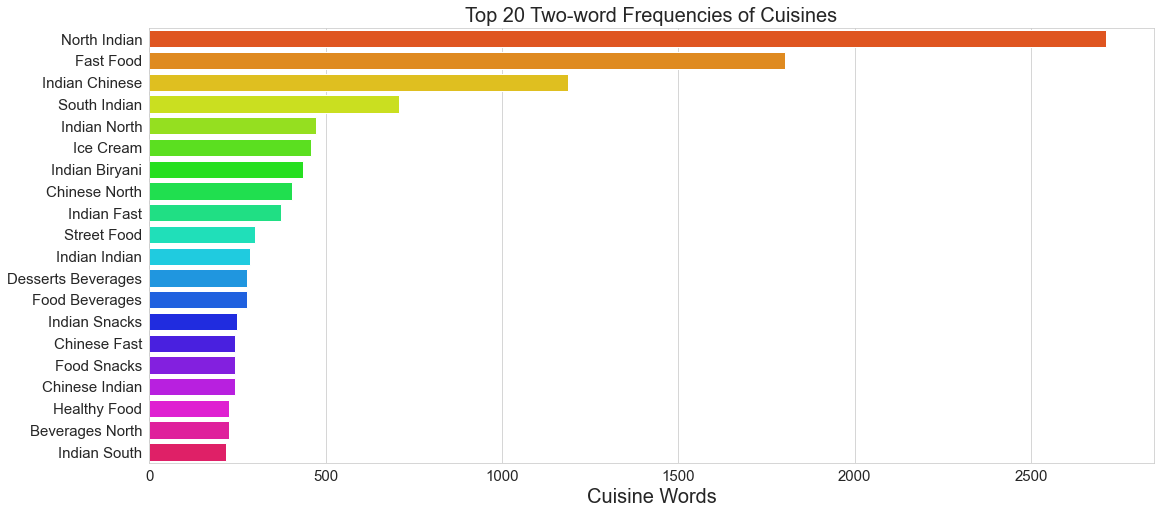

In [19]:
sns.set_style("whitegrid")
plt.figure(figsize = (18, 8))
sns.barplot(y = "Type", x = "Frequency", data = two_words_20c, palette = "hsv")
plt.title("Top 20 Two-word Frequencies of Cuisines", size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Cuisine Words", size = 20)
plt.ylabel(None)
plt.savefig("Top_20_Two-word_Frequencies_of_Cuisines.png")
plt.show()

Recommender System

In [20]:
df_percent = swiggy_data.sample(frac=0.40, random_state=1)

In [21]:
df_percent.shape


(3713, 6)

In [22]:
df_percent.set_index('Restaurant', inplace=True)

In [23]:
indices = pd.Series(df_percent.index)

In [24]:
tfidf = TfidfVectorizer(analyzer='word', ngram_range=(1, 2), min_df=0, stop_words='english')
tfidf_matrix = tfidf.fit_transform(df_percent['Type'])
print(tfidf_matrix)

  (0, 426)	0.2970006306969632
  (0, 450)	0.2017844577919594
  (0, 897)	0.3712183856820193
  (0, 418)	0.2095446562783311
  (0, 924)	0.19224776203693086
  (0, 278)	0.353566094305029
  (0, 752)	0.353566094305029
  (0, 239)	0.3166782131641802
  (0, 1005)	0.23764791737784802
  (0, 449)	0.2017844577919594
  (0, 885)	0.12871245070329793
  (0, 379)	0.21205536612957473
  (0, 922)	0.19189236490134082
  (0, 256)	0.16066646470143617
  (0, 751)	0.2668238392697723
  (0, 208)	0.09767353392901346
  (1, 931)	1.0
  (2, 377)	0.24217965550948642
  (2, 786)	0.5103911518934463
  (2, 547)	0.5672548847026686
  (2, 376)	0.24217965550948642
  (2, 776)	0.34233687321379996
  (2, 526)	0.36493738566257794
  (2, 379)	0.22371179349425835
  (3, 294)	0.8021311117253219
  :	:
  (3710, 115)	0.2336471672093139
  (3710, 802)	0.2031217483174892
  (3710, 150)	0.23914883168004333
  (3710, 144)	0.13836040764986937
  (3710, 105)	0.12656454456501776
  (3710, 741)	0.10503022802123786
  (3710, 470)	0.08038068796135857
  (3710, 739

In [25]:
cosine_similarities = linear_kernel(tfidf_matrix, tfidf_matrix)
print(cosine_similarities)

[[1.         0.         0.04743929 ... 0.03849062 0.         0.02115607]
 [0.         1.         0.         ... 0.         0.         0.        ]
 [0.04743929 0.         1.         ... 0.         0.         0.        ]
 ...
 [0.03849062 0.         0.         ... 1.         0.07766594 0.1519654 ]
 [0.         0.         0.         ... 0.07766594 1.         0.15819526]
 [0.02115607 0.         0.         ... 0.1519654  0.15819526 1.        ]]


In [26]:
def recommend(Restaurant, cosine_similarities = cosine_similarities):
    
    # Create a list to put top restaurants
    recommend_restaurant = []
    
    # Find the index of the hotel entered
    idx = indices[indices == Restaurant].index[0]
    
    # Find the restaurants with a similar cosine-sim value and order them from bigges number
    score_series = pd.Series(cosine_similarities[idx]).sort_values(ascending=False)
    
    # Extract top 30 restaurant indexes with a similar cosine-sim value
    top30_indexes = list(score_series.iloc[0:31].index)
    
    # Names of the top 30 restaurants
    for each in top30_indexes:
        recommend_restaurant.append(list(df_percent.index)[each])
    
    # Creating the new data set to show similar restaurants
    df_new = pd.DataFrame(columns=['Cost per person','Type','Rating'])
    
    # Create the top 30 similar restaurants with some of their columns
    for each in recommend_restaurant:
        df_new = df_new.append(pd.DataFrame(df_percent[['Cost per person','Type','Rating']][df_percent.index == each].sample()))
    
    # Drop the same named restaurants and sort only the top 10 by the highest rating
    df_new = df_new.drop_duplicates(subset=['Cost per person','Type','Rating'], keep=False)
    df_new = df_new.sort_values(by='Rating', ascending=False).head(10)
    
    print('TOP %s RESTAURANTS LIKE %s WITH SIMILAR REVIEWS: ' % (str(len(df_new)), Restaurant))
    
    return df_new

In [27]:
df_percent[df_percent.index == 'ANNAPURNA TIFFIN'].head()

,Cost per person,Type,Rating,Location,cost_for_2
Restaurant,,,,,
ANNAPURNA TIFFIN,100.0,South Indian Andhra North Indian Maharashtrian...,4.0,Kondhwa,200


In [28]:
recommend('ANNAPURNA TIFFIN')

TOP 10 RESTAURANTS LIKE ANNAPURNA TIFFIN WITH SIMILAR REVIEWS: 


,Cost per person,Type,Rating
Relax Family Garden Resto Bar,200.0,North Indian South Indian Maharashtrian,4.2
Mumma's Kitchen(Karve Nagar),100.0,North Indian Maharashtrian,4.1
ANNAPURNA TIFFIN,100.0,South Indian Andhra North Indian Maharashtrian...,4.0
The Biryani Experiment,250.0,Biryani Hyderabadi Indian Kebabs North Indian ...,4.0
The Taste Of Capital,150.0,North Indian Sweets Beverages,3.9
Swanandi Foods,100.0,South Indian Maharashtrian Fast Food,3.9
WORLD BIRYANI HOUSE,250.0,Biryani Sweets Beverages,3.9
Karan's Kitchen,150.0,Chinese North Indian Maharashtrian,3.9
Moonlight Kitchen,100.0,Chinese North Indian Maharashtrian,3.9
DHABA CURRY,150.0,North Indian Biryani South Indian Maharashtrian,3.9


In [29]:
popular_cuis=swiggy_data.groupby(['Location','Type']).agg('count')
data=popular_cuis.groupby(['Location'],
                         as_index=False).apply(lambda x : x.sort_values(by="Restaurant",ascending=False).head(3))['Restaurant'].reset_index().rename(columns={'Restaurant':'Count'})

data.head(100)


,level_0,Location,Type,Count
0,0,Bavdhan,Indian,16
1,0,Bavdhan,Chinese,7
2,0,Bavdhan,Fast Food,5
3,1,Bhosari,Indian,14
4,1,Bhosari,Chinese,11
...,...,...,...,...
91,30,wakad,Chinese,36
92,30,wakad,Fast Food,19
93,31,warje,Indian,9
94,31,warje,Chinese,6


Cheap unrated restaurants

In [30]:
cheap_rest=swiggy_data[['Restaurant','Cost per person', 'Location','Type','Rating']]
cheap_rest=cheap_rest[(cheap_rest['Cost per person'] <1000) & ( ( cheap_rest['Rating'] == 0 ))]
cheap_rest.head(10)

,Restaurant,Cost per person,Location,Type,Rating
20,LeanCrust Pizza - ThinCrust Experts,175.0,hadapsar,Pizzas Italian Healthy Food,0.0
112,Hotel Red Chilly,200.0,hadapsar,Chinese North Indian,0.0
128,Chopsticks Chinese,200.0,hadapsar,North Indian Chinese,0.0
173,MADHURAM,75.0,hadapsar,South Indian,0.0
411,Exotic Chinese,75.0,sinhgad,Chinese,0.0
567,Upsouth,125.0,wakad,South Indian Fast Food,0.0
609,Patel's Chhappanbhog,200.0,wakad,Indian Chinese North Indian Punjabi Biryani Ju...,0.0
671,Combo's Kitchen,100.0,wakad,North Indian Combo Chinese,0.0
698,Jumboking-Indian Burger,75.0,wakad,Street Food Fast Food Beverages,0.0
1472,Hyderabadi Biryani Express,100.0,baner,Chinese Biryani,0.0


Extremely cheap low rated restaurants

In [31]:
cheap_rest=swiggy_data[['Restaurant','Cost per person', 'Location','Type','Rating']]
cheap_rest=cheap_rest[(cheap_rest['Cost per person'] <300) & ( ( cheap_rest['Rating'] < 3.0 ) & (cheap_rest['Rating'] > 0.0 ))]
cheap_rest.head(10)

,Restaurant,Cost per person,Location,Type,Rating
14,Royal Punjab,150.0,hadapsar,North Indian Chinese Biryani,2.7
104,Purepur Kolhapur Family Restaurant,200.0,hadapsar,North Indian Chinese,2.0
137,Samruddhi Fast Food,100.0,hadapsar,North Indian Chinese Beverages,2.9
451,Al Madina Biryani House,125.0,sinhgad,Biryani Kebabs Desserts,2.8
1949,Shree Sai Veg Non-Veg Restaurant,125.0,shivajinagar,North Indian Chinese Biryani Punjabi Tandoor,2.8
3113,AADD (M) AADD (B),75.0,hinjewadi,Desserts Ice Cream,2.3
3308,Regal cake and bakers,100.0,hinjewadi,Desserts Bakery,2.9
3863,The Burger Project,175.0,Kothrud,American Beverages Desserts Snacks,2.9
3951,SK's Biryani House,100.0,Kothrud,Biryani Kebabs Chinese Tandoor Indian Maharash...,2.5
3972,Kadak Misal,100.0,Kothrud,Snacks,2.9


Cheap high rated restaurants

In [32]:
cheap_rest=swiggy_data[['Restaurant','Cost per person', 'Location','Type','Rating']]
cheap_rest=cheap_rest[(cheap_rest['Cost per person'] < 750) & ( ( cheap_rest['Rating'] > 3.0 ))]
cheap_rest.head(10)

,Restaurant,Cost per person,Location,Type,Rating
0,Haldirams Chaat,125.0,hadapsar,Chaat Snacks,4.0
1,Rohit food,575.0,hadapsar,Indian Chinese Desserts,3.9
2,Sahich,100.0,hadapsar,Maharashtrian,4.0
3,SHAMS KITCHEN,50.0,hadapsar,South Indian,3.9
4,MORYA MISAL,75.0,hadapsar,Snacks Beverages,3.9
5,HOTEL MAHARAJA DARBAR,100.0,hadapsar,Indian Biryani,3.9
6,Ratnas Kitchen,100.0,hadapsar,Thalis,3.9
7,Delicious Chowpatty,100.0,hadapsar,South Indian Beverages Juices,3.9
8,Shriya Pavbhaji,100.0,hadapsar,Indian Snacks,3.9
9,Punjab Kitchen,150.0,hadapsar,Punjabi North Indian Chinese Tandoor Thalis,3.9


Highly Rated and Highly reviewed Expensive restaurants


In [33]:
exp_rest=swiggy_data[['Restaurant','Cost per person', 'Location','Type','Rating']]
exp_rest=exp_rest[(exp_rest['Cost per person'] > 750) & ((exp_rest['Rating'] > 4.0))]
exp_rest.head(20)

,Restaurant,Cost per person,Location,Type,Rating
832,Atmosphere 6,800.0,top-rated,North Indian Chinese Italian,4.4
836,Cafe Delhi Heights,1000.0,top-rated,Continental Asian Australian,4.4
1130,House of Mandarin,1050.0,Outskirts,Chinese Oriental Asian Sushi PanAsian Japanese...,4.3
2303,CONRAD PUNE,1000.0,koregaon park,Continental Italian,4.4
4511,Origins,800.0,Kothrud,Thai Indonesian Japanese Burmese,4.6
5651,Atmosphere 6,800.0,Viman Nagar,North Indian Chinese Italian,4.4
5884,Cafe Delhi Heights,1000.0,Viman Nagar,Continental Asian Australian,4.4


Filtering by location
Filtering restaurants by location given by the user.

In [34]:
input_location = input()

Kothrud


In [37]:
location_rest = swiggy_data[['Restaurant','Cost per person', 'Location','Type','Rating']]
location_rest = cheap_rest[(location_rest['Location'] == input_location) & (location_rest['Cost per person'] < 750) & ( ( location_rest['Rating'] > 3.0 ))]
location_rest.head(10)

                         Restaurant  Cost per person Location  \
3854  Artinci - Indulge Guilt Free!            125.0  Kothrud   
3855             New Aswad Gomantak            100.0  Kothrud   
3856                Katakirrr Misal            100.0  Kothrud   
3857                Haldirams Chaat            150.0  Kothrud   
3858          Harry Puttar Da Dhaba            125.0  Kothrud   
...                             ...              ...      ...   
9246                 Sandwich Katta            100.0  Kothrud   
9247          Aditri Veg Restaurant            100.0  Kothrud   
9248              DA'NONNA PIZZERIA            100.0  Kothrud   
9249             The Tipsy Duckling            200.0  Kothrud   
9250            Ganesh Bhel-Kothrud             50.0  Kothrud   

                                                   Type  Rating  
3854  Healthy Food Keto Desserts Ice Cream Snacks Be...     4.4  
3855                      Indian Seafood Biryani Thalis     3.9  
3856                 

In [39]:
input_cost = int(input("Enter Cost : "))

Enter Cost : 600


In [40]:
cost_rest = swiggy_data[['Restaurant','Cost per person', 'Location','Type','Rating']]
cost_rest = cheap_rest[(cost_rest['Cost per person'] < input_cost)]
cost_rest.head(10)

,Restaurant,Cost per person,Location,Type,Rating
0,Haldirams Chaat,125.0,hadapsar,Chaat Snacks,4.0
1,Rohit food,575.0,hadapsar,Indian Chinese Desserts,3.9
2,Sahich,100.0,hadapsar,Maharashtrian,4.0
3,SHAMS KITCHEN,50.0,hadapsar,South Indian,3.9
4,MORYA MISAL,75.0,hadapsar,Snacks Beverages,3.9
5,HOTEL MAHARAJA DARBAR,100.0,hadapsar,Indian Biryani,3.9
6,Ratnas Kitchen,100.0,hadapsar,Thalis,3.9
7,Delicious Chowpatty,100.0,hadapsar,South Indian Beverages Juices,3.9
8,Shriya Pavbhaji,100.0,hadapsar,Indian Snacks,3.9
9,Punjab Kitchen,150.0,hadapsar,Punjabi North Indian Chinese Tandoor Thalis,3.9


In [44]:
inputloc = input("Enter your preferred locality : ")
inputprice = int(input("Enter your budget cost per person : "))
inputrating = float(input("Enter minimum rating : "))

Enter your preferred locality : Kothrud
Enter your budget cost per person : 300
Enter minimum rating : 4.0


In [45]:
recc_rest = swiggy_data[['Restaurant','Cost per person', 'Location','Type','Rating']]
recc_rest = cheap_rest[(recc_rest['Location'] == inputloc) & (recc_rest['Cost per person'] < inputprice) & ( ( recc_rest['Rating'] > inputrating ))]
recc_rest.head(10)

,Restaurant,Cost per person,Location,Type,Rating
3854,Artinci - Indulge Guilt Free!,125.0,Kothrud,Healthy Food Keto Desserts Ice Cream Snacks Be...,4.4
3856,Katakirrr Misal,100.0,Kothrud,Maharashtrian Snacks,4.1
3859,Khandesh Express,175.0,Kothrud,North Indian,4.1
3862,McDonald's,200.0,Kothrud,American,4.3
3865,Natural Ice Cream,75.0,Kothrud,Ice Cream,4.7
3872,Shaukeen - The Complete Paan Shop,75.0,Kothrud,Desserts,4.6
3874,BIGGIES BURGER,125.0,Kothrud,Beverages French Indian American Continental C...,4.2
3880,Kalinga Veg Gourmet Kitchen,200.0,Kothrud,North Indian European Continental Fast Food Ma...,4.2
3884,Khandeshi Zatka,150.0,Kothrud,Maharashtrian North Indian,4.1
3889,Burger It Up,200.0,Kothrud,American Continental Beverages Desserts,4.3
